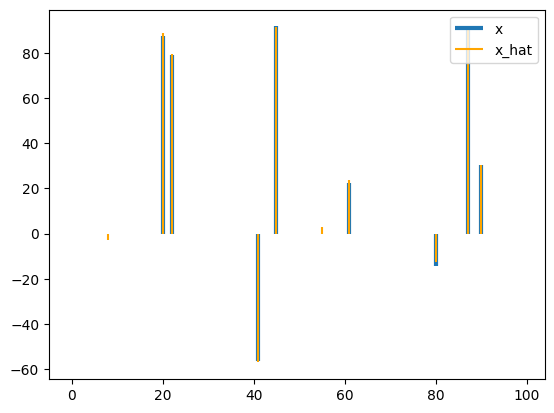

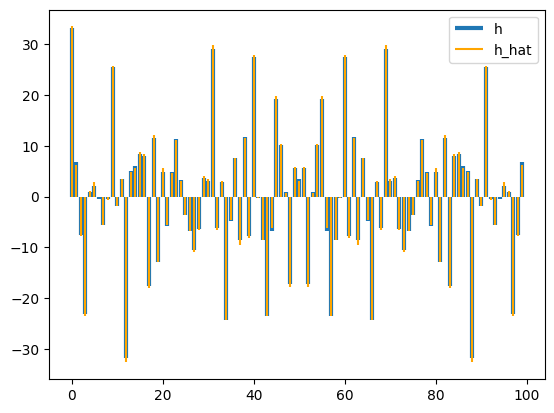

In [52]:
from src.data_generation import build_dataset
from src.utils import Config, generate_sensing_matrix
import numpy as np
import scipy as sp
from src.algorithms import omp
from src.visualization import visualize_reconstruction
import matplotlib.pyplot as plt

max_amplitude = 100
min_sparsity = 7
max_sparsity = 9
vector_size = 100
data_set_size = 10000

config = Config(dataset_size = 1,
    vector_size= 100,   
    max_amplitude= 100,
    min_sparsity= 5,
    max_sparsity= 10,
    noise_level= 1,
    omp_epsilon= 1,
    omp_max_iterations= 10,
    sensing_matrix_rows= 50,
    alg= "omp",  # Options: "omp", "psomp", "ml"
    model_path= "models/sparse_recovery_model.pth"
)

#visualize_reconstruction(config)


h, x = build_dataset(config)
Phi = generate_sensing_matrix(config.sensing_matrix_rows,config.vector_size)
# First generate the output
y = Phi @ x
y = y + config.noise_level * np.random.randn(*y.shape)
x_hat = omp(Phi,y,config.omp_epsilon,config.omp_max_iterations)
DFT = sp.linalg.dft(config.vector_size)/np.sqrt(config.vector_size)
h_hat = DFT @ x_hat
indices = range(len(x_hat))
plt.vlines(indices,0,x,linewidth=3)
plt.vlines(indices,0,x_hat,colors="orange")

plt.legend(("x","x_hat"))
plt.show()

plt.vlines(indices,0,h,linewidth=3)
plt.vlines(indices,0,h_hat,colors="orange")

plt.legend(("h","h_hat"))
plt.show()

In [ ]:
-

(50,)
(50,)


In [33]:
h, x = build_dataset(config)

y = A @ h

x_hat = omp(A@DFT,y,config.omp_epsilon,config.omp_max_iterations)
indices = range(len(x_hat))
plt.vlines(indices,0,x,linewidth=3)
plt.vlines(indices,0,x_hat,colors="orange")

plt.legend(("x","x_hat"))

NameError: name 'A' is not defined

In [5]:
from src.utils import apply_iq_imbalance
from src.algorithms import psomp, find_x_xi
import numpy as np
xi = 0.71 + 0.1j
x = np.random.randn(100)
print(np.shape(x))
z = apply_iq_imbalance(x,xi)
z_1 = z[0:50]
z_1_hat = xi*x
x_hat, xi_hat = find_x_xi(z)

(100,)


In [6]:

print(f"True xi: {xi}, Estimated xi: {xi_hat}")
print(f"Reconstruction error: {np.linalg.norm(x - x_hat)}")
print(x - x_hat)

True xi: (0.71+0.1j), Estimated xi: [[0.71+0.1j]]
Reconstruction error: 1.53043456469481e-15
[-1.38777878e-17-4.79149453e-18j -8.67361738e-19-1.49734204e-19j
  5.55111512e-17+9.58298905e-18j -5.55111512e-17-1.43744836e-17j
 -1.11022302e-16-3.83319562e-17j -1.73472348e-18-2.99468408e-19j
  4.44089210e-16+3.83319562e-17j  5.55111512e-17+2.87489672e-17j
  2.22044605e-16+5.74979343e-17j  5.55111512e-17+1.91659781e-17j
  0.00000000e+00+1.14995869e-16j  5.55111512e-17+1.91659781e-17j
 -1.11022302e-16-2.87489672e-17j  2.22044605e-16+3.83319562e-17j
  0.00000000e+00-2.87489672e-17j -2.22044605e-16-3.83319562e-17j
 -5.55111512e-17-9.58298905e-18j -2.22044605e-16-7.66639124e-17j
  2.77555756e-17+9.58298905e-18j  0.00000000e+00+4.79149453e-18j
 -2.22044605e-16-7.66639124e-17j  1.73472348e-18+4.49202612e-19j
  1.11022302e-16+2.87489672e-17j  0.00000000e+00-3.83319562e-17j
  0.00000000e+00-1.43744836e-17j  1.11022302e-16+3.83319562e-17j
  6.93889390e-18+2.39574726e-18j  5.55111512e-17+1.91659781e-1

True xi: (0.71+0.1j), Estimated xi: (0.7131396726543044+0.0976769944537351j)
Reconstruction error: 21.65740789525703
(100, 1)
(100, 1)


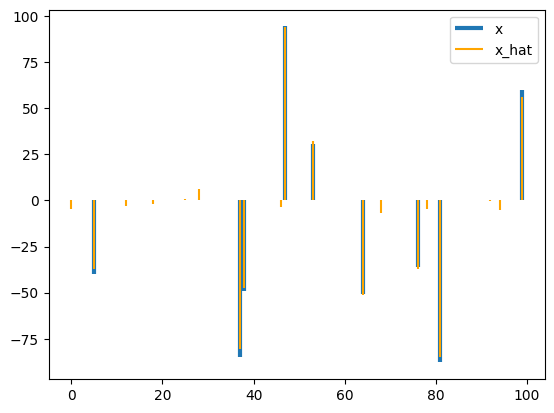

In [15]:
from src.algorithms import psomp, find_x_xi
from src.utils import apply_iq_imbalance, iq_imbalanced_measurement, generate_random_phase_matrix, unitary_dft
from src.data_generation import generate_sparse_vector
import numpy as np
import matplotlib.pyplot as plt

xi = 0.71 + 0.1j
n = 100
m = 50
s = 10
amp = 100
x = generate_sparse_vector(s,n,amp)
F = generate_random_phase_matrix(m,n)
U = unitary_dft(n)
A = F @ U
y = iq_imbalanced_measurement(A,x, xi,1)
z_hat = psomp(A,y,2*s)
x_hat, xi_hat = find_x_xi(z_hat)
print(f"True xi: {xi}, Estimated xi: {xi_hat}")
print(f"Reconstruction error: {np.linalg.norm(x - x_hat)}")
print(x.shape)
print(x_hat.shape)

indices = range(len(x_hat))
plt.vlines(indices,0,x,linewidth=3)
plt.vlines(indices,0,x_hat,colors="orange")

plt.legend(("x","x_hat"))